In [15]:
%load_ext autoreload
%autoreload 2

import numpy as np
import matplotlib.pyplot as plt
import sys

sys.path.append('..')

from envs.random_walk import RandomWalkEnv
from stable_baselines3 import PPO
from stable_baselines3.common.callbacks import BaseCallback
from stable_baselines3.common.evaluation import evaluate_policy

from collections import deque

from tqdm.notebook import tqdm

from utils.logging import EvalLogCallback

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


0it [00:00, ?it/s]

Output()

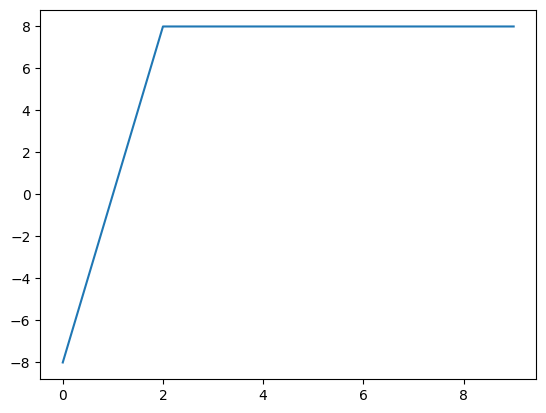

In [16]:
env = RandomWalkEnv()

agent = PPO('MlpPolicy', env)
callback = EvalLogCallback(eval_every=1, smooth_window=2, model=agent, eval_env=env)
agent.learn(total_timesteps=20000, progress_bar=True, callback=callback)
callback.plot_rewards()

# why is the number of rollouts much smaller than the number of iterations?
# it's annoying but it doesn't really matter as we will be mainly developing our own algorithms

In [13]:
mean_reward, std_reward = evaluate_policy(
    agent, env, render=False, n_eval_episodes=1, deterministic=True, warn=False
)

mean_reward, std_reward

(8.0, 0.0)

-1
9


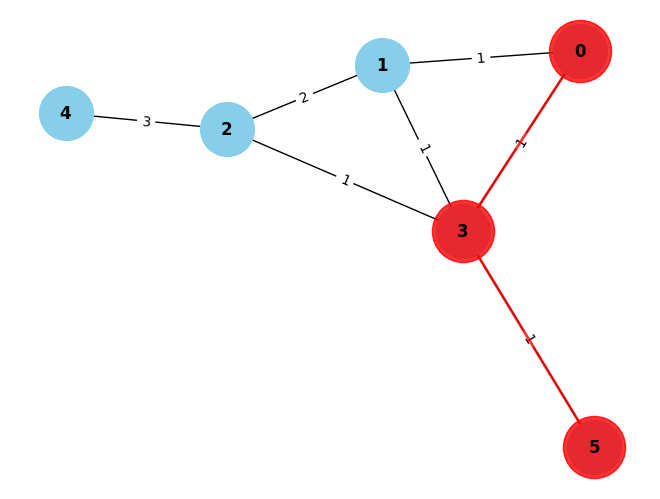

In [14]:
obs, _ = env.reset()

for i in range(1000):
    action, _states = agent.predict(obs)
    obs, rewards, terminated, truncated, info = env.step(action.item())
    print(rewards)
    if terminated or truncated:
        break
env.render()